In [1]:
using DataFrames
using DataStructures
using StatsPlots
using Distributions
using Interpolations
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

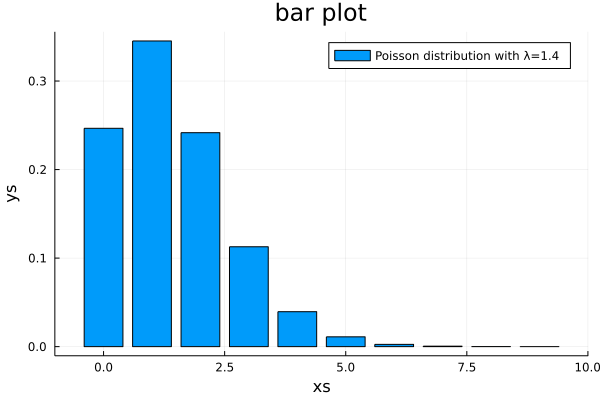

In [2]:
lambda = 1.4
goals = 0:9
pmf_goals = make_poisson_pmf(lambda, goals)
bar(pmf_goals, label="Poisson distribution with λ=1.4")

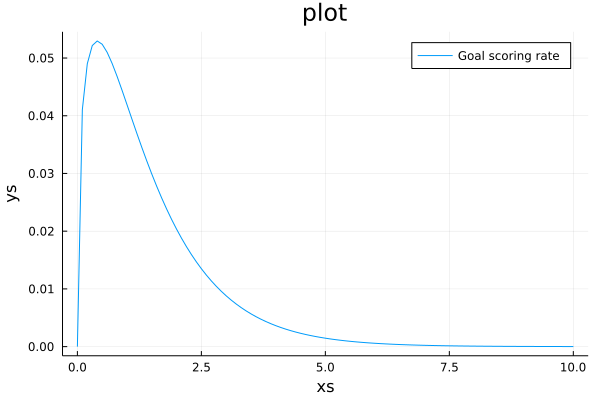

In [3]:
alpha = 1.4
vals = [x for x in 0:0.1:10]
g = Gamma(alpha)
ps = [pdf(g, v) for v in vals];
prior = pmf_from_seq(vals, normalize(ps))
plot(prior, label="Goal scoring rate")

In [4]:
mean(prior)

1.4140818156118378

## The Update

In [5]:
lamda = 1.4
p = Poisson(lamda)
k = 4
pdf(p, k)


0.039471954028253146

In [6]:
lambdas = values(prior)
k = 4
likelihood = [pdf(Poisson(lambda), k) for lambda in lambdas];

In [7]:
france = copy(prior)
france = update_poisson(france, 4);

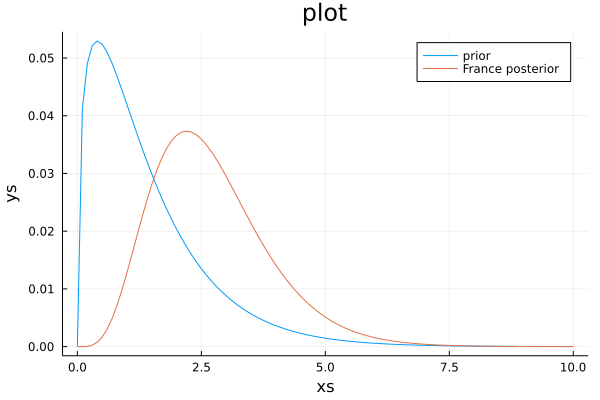

In [8]:
plot(prior, label="prior")
plot!(france, label="France posterior")

In [9]:
croatia = copy(prior)
croatia = update_poisson(croatia, 2)

101×2 DataFrame
 Row │ Values   Probs      
     │ Float64  Float64    
─────┼─────────────────────
   1 │     0.0  0.0
   2 │     0.1  0.00115411
   3 │     0.2  0.00498724
   4 │     0.3  0.0108049
   5 │     0.4  0.0176447
   6 │     0.5  0.0246797
   7 │     0.6  0.031298
   8 │     0.7  0.0370962
  ⋮  │    ⋮         ⋮
  95 │     9.4  5.24659e-7
  96 │     9.5  4.40603e-7
  97 │     9.6  3.69916e-7
  98 │     9.7  3.10489e-7
  99 │     9.8  2.60542e-7
 100 │     9.9  2.18575e-7
 101 │    10.0  1.83323e-7
            86 rows omitted

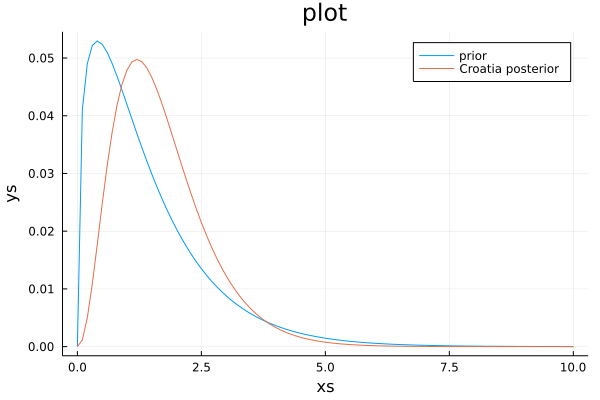

In [10]:
plot(prior, label="prior")
plot!(croatia, label="Croatia posterior")

In [11]:
mean(croatia), mean(france)

(1.6999765866755225, 2.6997723933423083)

In [12]:
prob_gt(croatia, france)

0.227269921368797